### 5. Short-list promising models
We expect you to do some additional research and train at **least one model per team member**.

1. Train mainly quick and dirty models from different categories (e.g. linear, SVM, Random Forests etc) using default parameters
2. Measure and compare their performance
3. Analyse the most significant variables for each algorithm
4. Analyse the types of errors the models make
5. Have a quick round of feature selection and engineering if necessary
6. Have one or two more quick iterations of the five previous steps
7. Short-list the top three to five most promising models, preferring models that make different types of errors

In [1]:
import pandas as pd

df = pd.read_csv('DataPrepared.csv')
df.set_index('title', inplace=True)
df.index.name = None
df

,episodes,score,is_licensed,nr_synonyms,min_duration,title_len,source_4-koma manga,source_Book,source_Card game,source_Digital manga,...,rating_G - All Ages,rating_PG - Children,rating_PG-13 - Teens 13 or older,rating_R - 17+ (violence & profanity),rating_R+ - Mild Nudity,release_season_Fall,release_season_Spring,release_season_Summer,release_season_Winter,Hentai
Inu x Boku SS,12,7.63,True,1,24.0,13,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
Seto no Hanayome,26,7.89,True,1,24.0,16,False,False,False,False,...,False,False,True,False,False,False,True,False,False,False
Shugo Chara!! Doki,51,7.55,True,2,24.0,18,False,False,False,False,...,False,True,False,False,False,True,False,False,False,False
Princess Tutu,38,8.21,True,0,16.0,13,False,False,False,False,...,False,False,True,False,False,False,False,True,False,False
Bakuman. 3rd Season,25,8.67,True,1,24.0,19,False,False,False,False,...,False,False,True,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Doupo Cangqiong 2nd Season,0,7.20,False,2,20.0,26,False,False,False,False,...,False,False,True,False,False,False,True,False,False,False
Diamond Fusion,1,7.27,False,1,3.0,14,False,False,False,False,...,True,False,False,False,False,False,True,False,False,False
Hitori no Shita: The Outcast Recap,1,6.04,False,2,24.0,34,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
Inazuma Eleven x Kaitou Gru no Tsuki Dorobou,4,5.87,False,1,0.2,44,False,False,False,False,...,True,False,False,False,False,False,False,False,True,False


### First we have to look at how we can categorize score

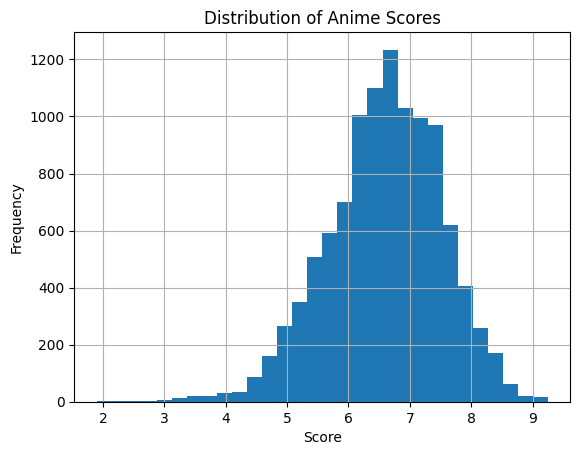

In [2]:
import matplotlib.pyplot as plt

df['score'].hist(bins=30) 
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Distribution of Anime Scores')
plt.show()

##### Lets start by using only animes in the range from 4-9 - and then split it in .5 increments, as to limit outliers

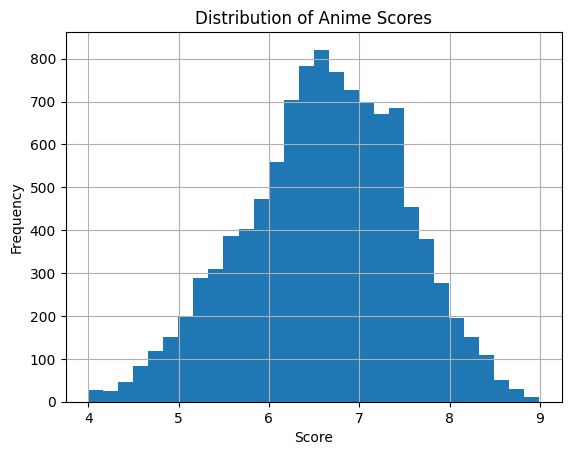

In [3]:
filtered_df = df[(df['score'] >= 4) & (df['score'] <= 9)]


filtered_df['score'].hist(bins=30) 
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Distribution of Anime Scores')
plt.show()

In [4]:
# Assuming filtered_df is your DataFrame and 'score' is the column with scores

# For some reason lowerbound isn't working, so I'm going to use 3.999 as the lower bound
score_ranges = [(3.999, 4.5), (4.5, 5.0), (5.0, 5.5), (5.5, 6.0), (6.0, 6.5),
                (6.5, 7.0), (7.0, 7.5), (7.5, 8.0), (8.0, 8.5), (8.5, 9.0)]

# Define bins to include all scores up to and including the maximum score
bins = [x[0] for x in score_ranges] + [max(score_ranges[-1][1], max(filtered_df['score']))]

# Categorize scores into classes
filtered_df['class'] = pd.cut(filtered_df['score'], bins=bins, labels=False)

mapping_dict = {
    0: 'Score 4.0-4.5',
    1: 'Score 4.5-5.0',
    2: 'Score 5.0-5.5',
    3: 'Score 5.5-6.0',
    4: 'Score 6.0-6.5',
    5: 'Score 6.5-7.0',
    6: 'Score 7.0-7.5',
    7: 'Score 7.5-8.0',
    8: 'Score 8.0-8.5',
    9: 'Score 8.5-9.0'
}

filtered_df['class'] = filtered_df['class'].map(mapping_dict)

class_counts_renamed = filtered_df['class'].value_counts()
print(class_counts_renamed)

class
Score 6.5-7.0    2310
Score 6.0-6.5    2061
Score 7.0-7.5    2058
Score 5.5-6.0    1269
Score 7.5-8.0    1084
Score 5.0-5.5     812
Score 8.0-8.5     449
Score 4.5-5.0     356
Score 4.0-4.5      99
Score 8.5-9.0      85
Name: count, dtype: int64


C:\Users\simon\AppData\Local\Temp\ipykernel_19208\210423653.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['class'] = pd.cut(filtered_df['score'], bins=bins, labels=False)
C:\Users\simon\AppData\Local\Temp\ipykernel_19208\210423653.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['class'] = filtered_df['class'].map(mapping_dict)


#### The algorithms used for the 'quick and dirty' testing will be:
- trees
- SVM
- Naive bayes(gausseanNB)

#### As they should be best at handling high dimensionality

In [5]:
filtered_df.shape

(10583, 158)

In [6]:
from sklearn.model_selection import train_test_split

# quick train test split
X = filtered_df.drop(['class','score'], axis=1)
y = filtered_df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##### SVM's

In [7]:
from sklearn import svm

clf = svm.SVC(kernel='linear', verbose=2)

clf.fit(X_train, y_train)

y_train_pred_svm = clf.predict(X_train)

# Predict the response for the test dataset
y_test_pred_svm = clf.predict(X_test)



[LibSVM]

#### Using precision, recall, f1 - as this is multi dimensional

In [8]:
from sklearn.metrics import classification_report

report_train_svm = classification_report(y_train, y_train_pred_svm, output_dict=True)
report_test_svm = classification_report(y_test, y_test_pred_svm, output_dict=True)

#### Plotting to feature importance to get an overview (although its impossible to read with all the features)

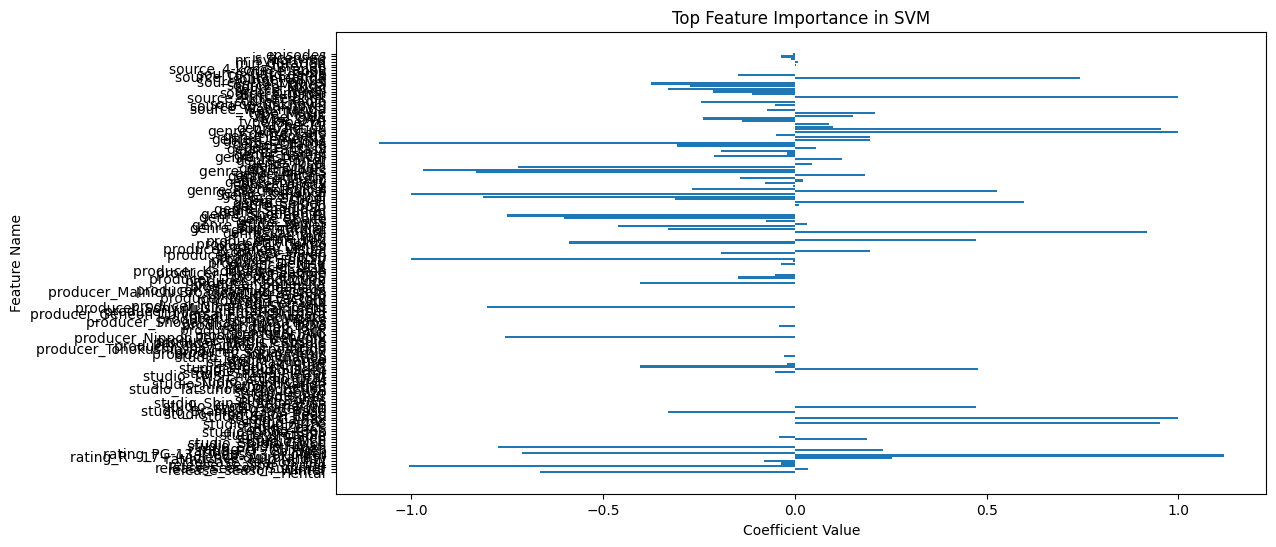

In [9]:
import numpy as np

feature_names = X_train.columns 
coefficients = clf.coef_[0]

# Function to plot feature importance
def plot_feature_importance(coefficients, feature_names):
    plt.figure(figsize=(12, 6))
    plt.barh(feature_names, coefficients)
    plt.xlabel('Coefficient Value')
    plt.ylabel('Feature Name')
    plt.title('Top Feature Importance in SVM')
    
    plt.gca().invert_yaxis() 
    plt.show()

plot_feature_importance(coefficients, feature_names)

### Decision tree
##### Following same process as before and will be comparing in the end

In [10]:
from sklearn.tree import DecisionTreeClassifier

clf_tree  = DecisionTreeClassifier(random_state=42)

clf_tree.fit(X_train, y_train)

y_train_pred_tree = clf_tree.predict(X_train)

y_test_pred_tree = clf_tree.predict(X_test)

In [11]:
report_train_tree = classification_report(y_train, y_train_pred_tree, output_dict=True)
report_test_tree = classification_report(y_test, y_test_pred_tree, output_dict=True)

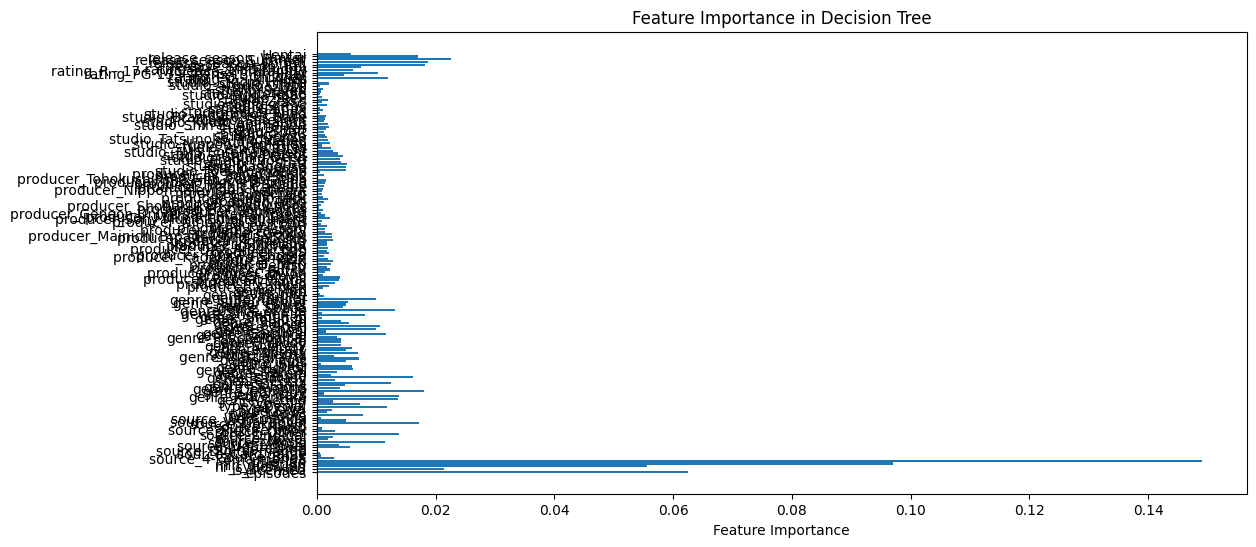

In [12]:
feature_importances = clf_tree.feature_importances_

# Plot feature importances
plt.figure(figsize=(12, 6))
plt.barh(range(len(feature_importances)), feature_importances)
plt.yticks(range(len(feature_importances)), X_train.columns)
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Decision Tree')
plt.show()

#### Random forrest

In [13]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(n_estimators=100, random_state=42)

clf_rf.fit(X_train, y_train)
y_train_pred_rf = clf_rf.predict(X_train)
y_test_pred_rf = clf_rf.predict(X_test)

In [14]:
report_train_rf = classification_report(y_train, y_train_pred_rf, output_dict=True)
report_test_rf = classification_report(y_test, y_test_pred_rf, output_dict=True)

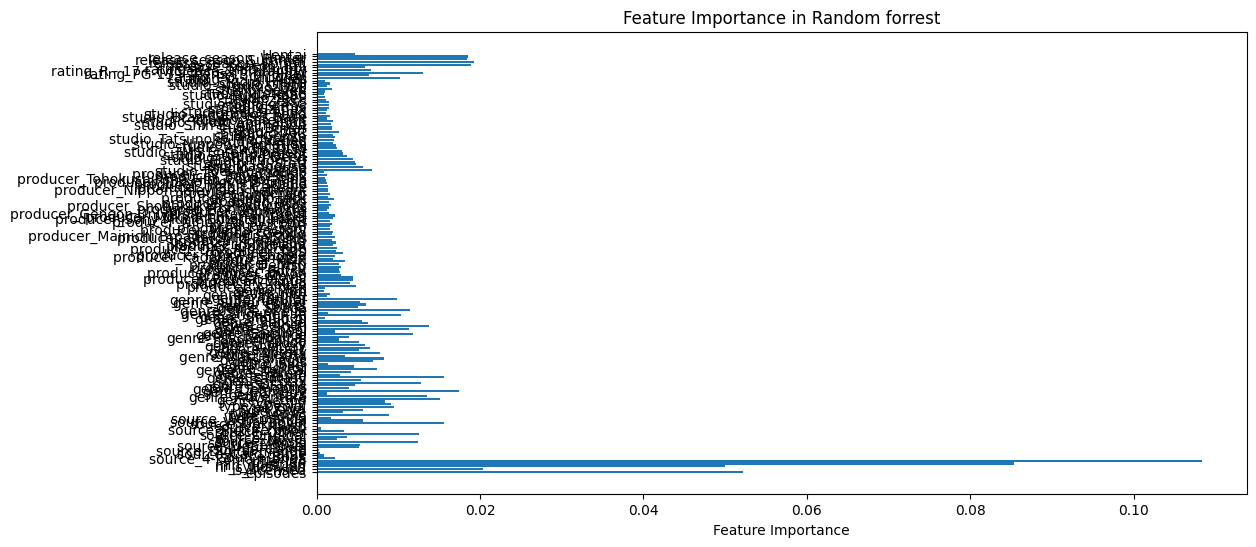

In [15]:
feature_importances = clf_rf.feature_importances_

# Plot feature importances
plt.figure(figsize=(12, 6))
plt.barh(range(len(feature_importances)), feature_importances)
plt.yticks(range(len(feature_importances)), X_train.columns) 
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Random forrest')
plt.show()

### GradientBoosted tree

In [16]:
from sklearn.ensemble import GradientBoostingClassifier

clf_gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1,
                                    max_depth=2, random_state=42)

clf_gb.fit(X_train, y_train)

y_train_pred_gb = clf_gb.predict(X_train)

# Predict the response for the test dataset
y_test_pred_gb = clf_gb.predict(X_test)

In [17]:
report_train_gb = classification_report(y_train, y_train_pred_gb, output_dict=True)
report_test_gb = classification_report(y_test, y_test_pred_gb, output_dict=True)

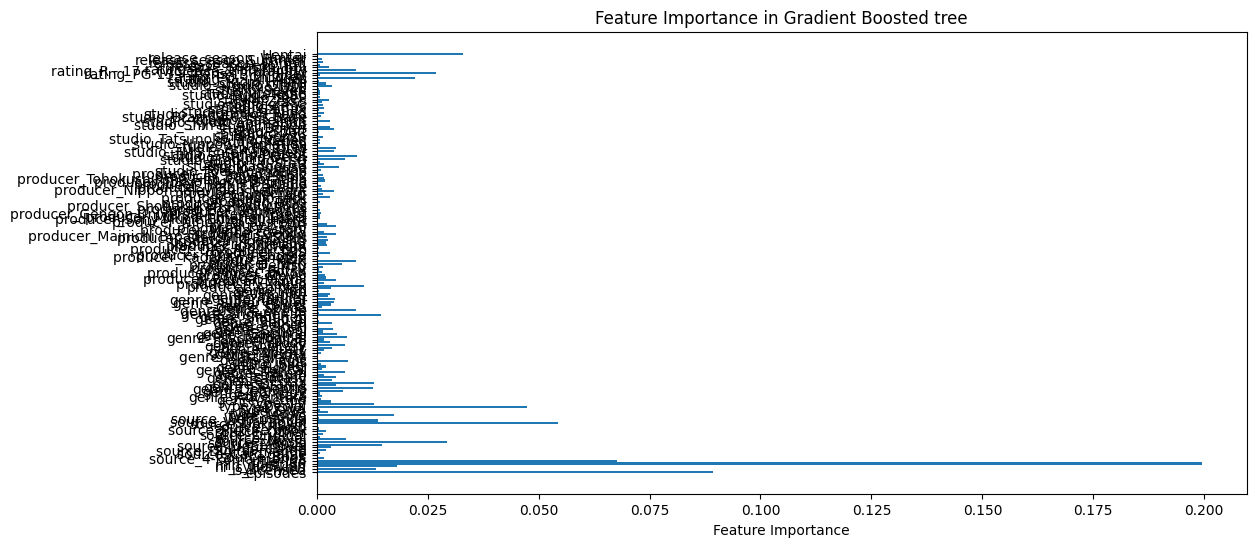

In [18]:
feature_importances = clf_gb.feature_importances_

# Plot feature importances
plt.figure(figsize=(12, 6))
plt.barh(range(len(feature_importances)), feature_importances)
plt.yticks(range(len(feature_importances)), X_train.columns)
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Gradient Boosted tree')
plt.show()

#### GaussianNB

In [19]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb.fit(X_train, y_train)

y_train_pred_gnb  = gnb.predict(X_train)
y_test_pred_gnb  = gnb.predict(X_test)

In [20]:
report_train_gnb = classification_report(y_train, y_train_pred_gnb, output_dict=True)
report_test_gnb = classification_report(y_test, y_test_pred_gnb,  output_dict=True)

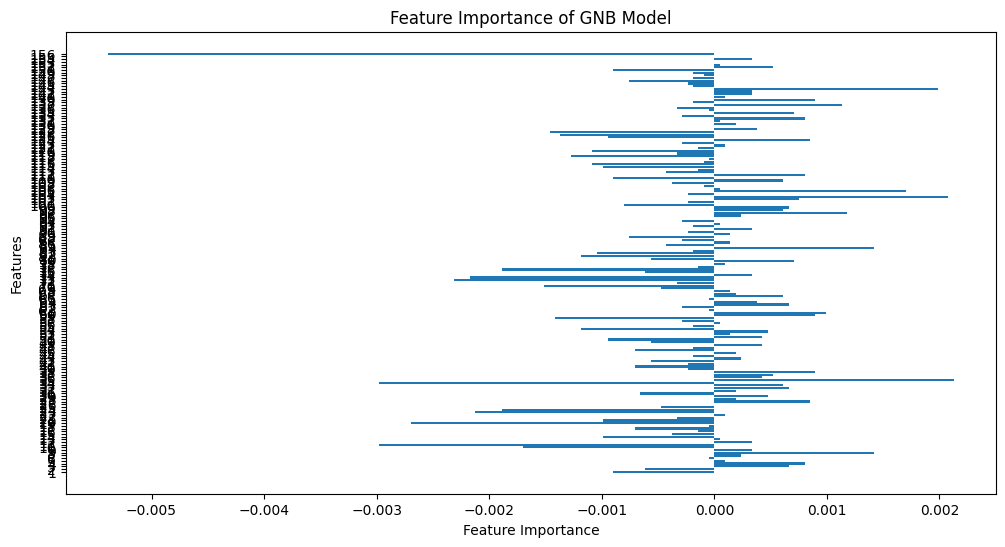

In [21]:
from sklearn.inspection import permutation_importance

result = permutation_importance(gnb, X_test, y_test, n_repeats=10, random_state=42)

plt.figure(figsize=(12, 6))
plt.barh(range(len(result.importances_mean)), result.importances_mean)
plt.yticks(range(len(result.importances_mean)), range(1, len(result.importances_mean)+1))
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance of GNB Model')
plt.show()

### Comparing results

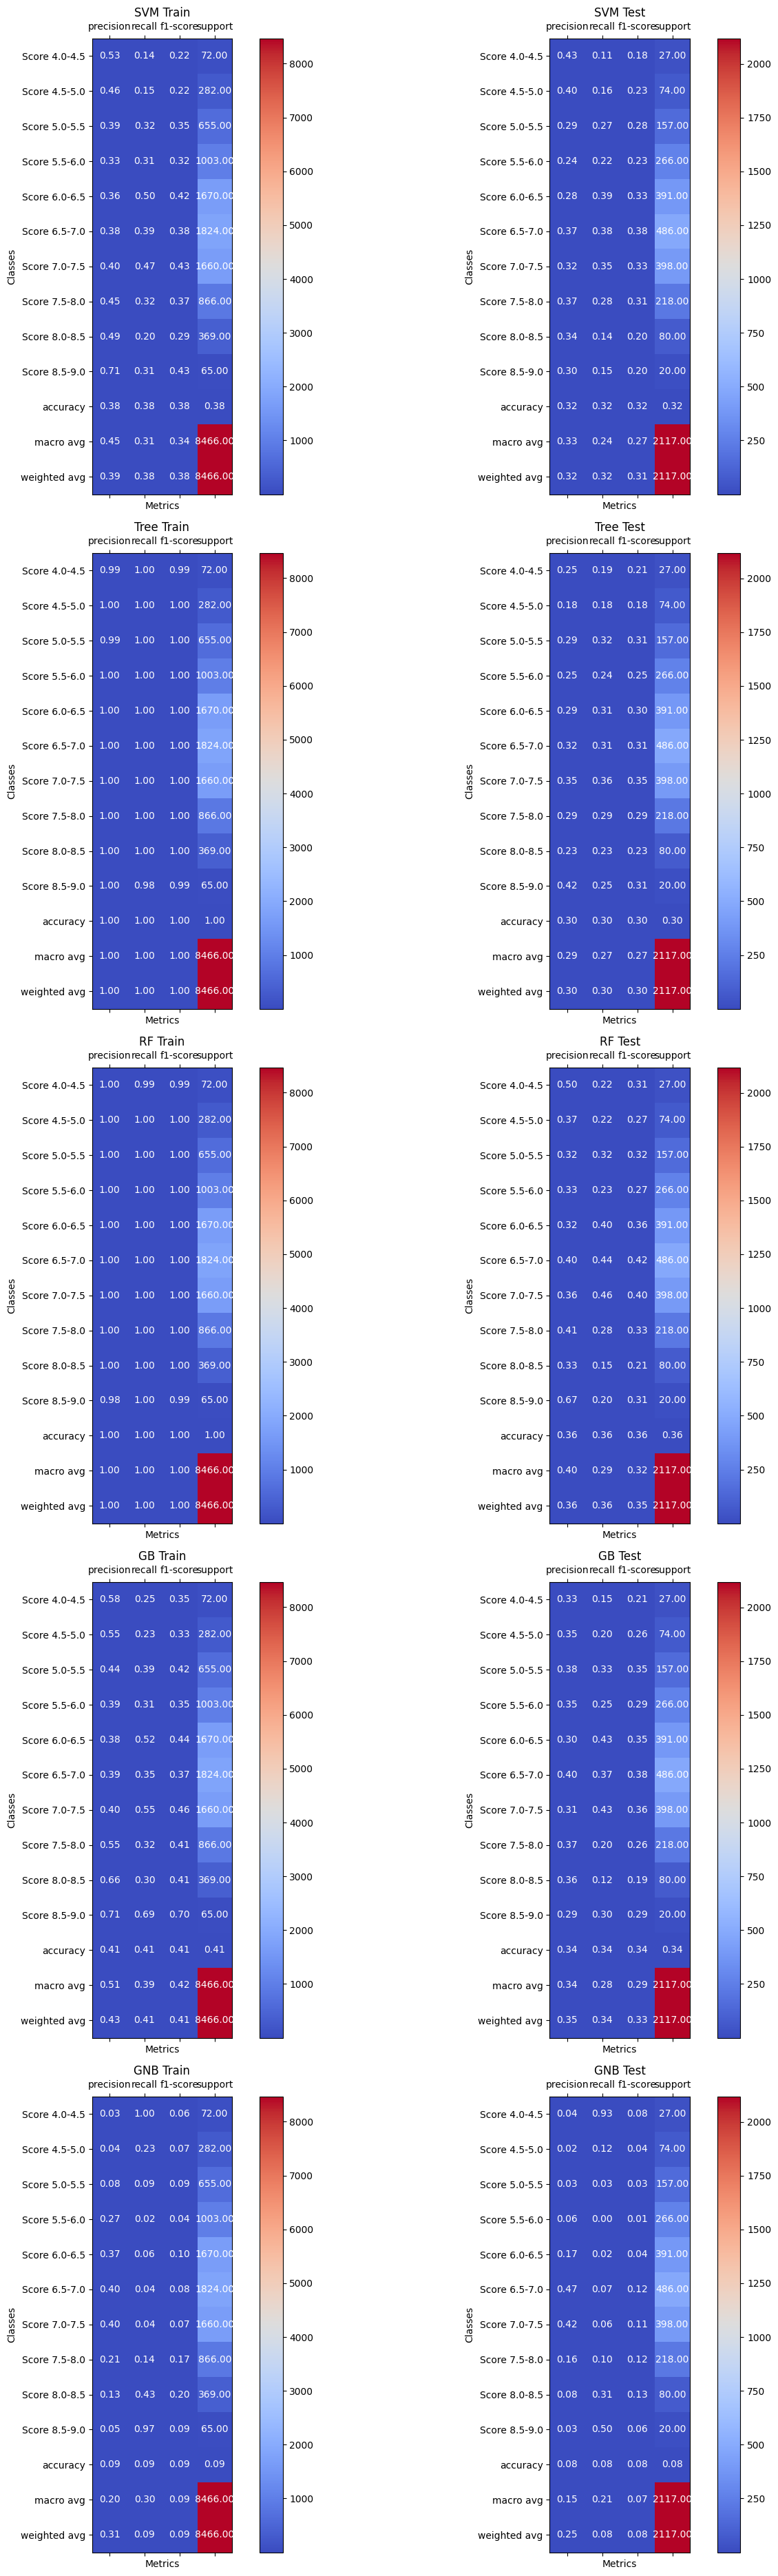

In [22]:
def plot_multiple_classification_reports(reports, titles, n_rows, n_cols):
    fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, 15 * n_rows / n_cols))
    axs = axs.flatten() 

    for i, (report, title) in enumerate(zip(reports, titles)):
        labels = list(report.keys()) 
        metrics = ['precision', 'recall', 'f1-score', 'support']
        
        data = []
        for label in labels:
            if label == 'accuracy':
                data.append([report[label]] * len(metrics))
            else:
                data.append([report[label].get(metric, report[label]) for metric in metrics])
        
        data = np.array(data)

        ax = axs[i]
        cax = ax.matshow(data, cmap='coolwarm')
        ax.set_xticks(range(len(metrics))) 
        ax.set_yticks(range(len(labels)))
        ax.set_xlabel('Metrics')
        ax.set_ylabel('Classes')
        ax.set_title(title)
        ax.xaxis.set_ticklabels(metrics)
        ax.yaxis.set_ticklabels(labels)
        
        fig.colorbar(cax, ax=ax)
        
        for (j, k), val in np.ndenumerate(data):
            ax.text(k, j, f'{val:.2f}' if isinstance(val, float) else f'{val}', ha='center', va='center', color='white')

    plt.tight_layout()
    plt.show()

reports = [
    report_train_svm,
    report_test_svm,
    report_train_tree,
    report_test_tree,
    report_train_rf,
    report_test_rf,
    report_train_gb,
    report_test_gb,
    report_train_gnb,
    report_test_gnb
]

titles = [
    "SVM Train",
    "SVM Test",
    "Tree Train",
    "Tree Test",
    "RF Train",
    "RF Test",
    "GB Train",
    "GB Test",
    "GNB Train",
    "GNB Test"
]

plot_multiple_classification_reports(reports, titles, n_rows=5, n_cols=2)


#### Looking at the reports it seems that the best bet to already narrow it down to GB tree and SVM lets look at the feature importance plots again for these 2 models as they had a lot of non important features, we might be able to remove a lot of them. And then do another iteration. Also want to try changing score categories to bad(4.0-6.0) / mid(6.0-7.5) / good(7.5-9.0)

In [23]:
filtered_df = filtered_df.copy()
filtered_df.drop(['class'], axis=1, inplace=True)


# For some reason lowerbound isn't working, so I'm going to use 3.999 as the lower bound
score_ranges = [(3.999, 6.0), (6.0, 7.5), (7.5, 9.0)]

bins = [x[0] for x in score_ranges] + [max(score_ranges[-1][1], max(filtered_df['score']))]

filtered_df['class'] = pd.cut(filtered_df['score'], bins=bins, labels=False)

mapping_dict = {
    0: 'Score 4.0-6.0 - bad',
    1: 'Score 6.0-7.5 - mid',
    2: 'Score 7.5-9.0 - good',
}

filtered_df['class'] = filtered_df['class'].map(mapping_dict)

class_counts_renamed = filtered_df['class'].value_counts()
print(class_counts_renamed)

class
Score 6.0-7.5 - mid     6429
Score 4.0-6.0 - bad     2536
Score 7.5-9.0 - good    1618
Name: count, dtype: int64


In [24]:
feature_importances_gb = clf_gb.feature_importances_
feature_names = X_train.columns

# Get the indices of the top 5 features
top_indices = np.argsort(feature_importances_gb)[-5:][::-1]

# Print the top 5 features and their importances
print("Top 5 features with highest importance:")
for i in top_indices:
    print(f"{feature_names[i]}: {feature_importances_gb[i]}")

Top 5 features with highest importance:
min_duration: 0.19958598842036251
episodes: 0.08939852340667563
title_len: 0.06763630935044401
source_Unknown: 0.054322433138010134
type_OVA: 0.04735787902625719


In [25]:
filtered_df = filtered_df.copy()

feature_importances_gb = clf_gb.feature_importances_

# Tried different thresholds, removing more than features with 0 importance drasticly reduced it's accuracy on good animes
importance_threshold = 0

important_indices = np.where(feature_importances_gb > importance_threshold)[0]

important_features = filtered_df.columns[important_indices]

additional_features = ['class', 'score']
all_features = list(important_features) + [feat for feat in additional_features if feat in filtered_df.columns and feat not in important_features]

filtered_df_gb = filtered_df[all_features]

# Display the unique columns of the new DataFrame
print(filtered_df_gb.columns.unique())


Index(['episodes', 'score', 'is_licensed', 'nr_synonyms', 'min_duration',
       'title_len', 'source_Book', 'source_Card game', 'source_Digital manga',
       'source_Game',
       ...
       'rating_G - All Ages', 'rating_PG - Children',
       'rating_PG-13 - Teens 13 or older',
       'rating_R - 17+ (violence & profanity)', 'rating_R+ - Mild Nudity',
       'release_season_Fall', 'release_season_Spring', 'release_season_Summer',
       'release_season_Winter', 'class'],
      dtype='object', length=146)


                      precision    recall  f1-score   support

 Score 4.0-6.0 - bad       0.78      0.51      0.61      2012
 Score 6.0-7.5 - mid       0.71      0.93      0.81      5154
Score 7.5-9.0 - good       0.78      0.27      0.40      1300

            accuracy                           0.73      8466
           macro avg       0.76      0.57      0.61      8466
        weighted avg       0.74      0.73      0.70      8466

                      precision    recall  f1-score   support

 Score 4.0-6.0 - bad       0.76      0.51      0.61       524
 Score 6.0-7.5 - mid       0.70      0.91      0.79      1275
Score 7.5-9.0 - good       0.71      0.25      0.36       318

            accuracy                           0.71      2117
           macro avg       0.72      0.56      0.59      2117
        weighted avg       0.72      0.71      0.68      2117



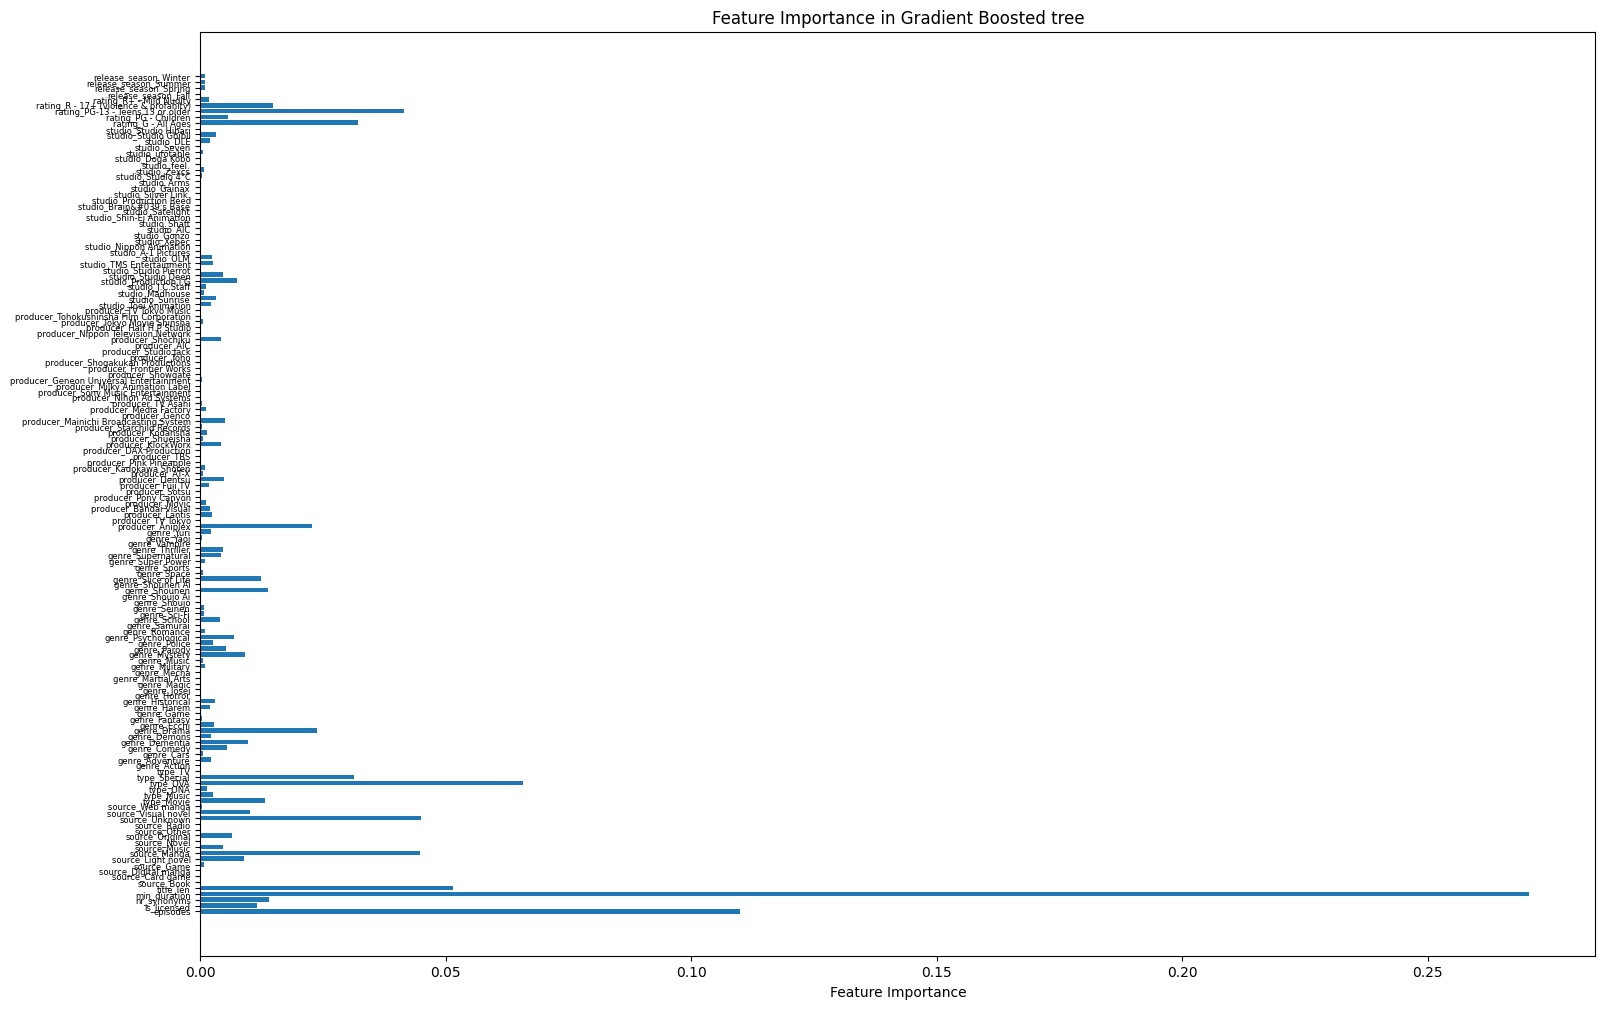

In [26]:
X = filtered_df_gb.drop(['class','score'], axis=1)
y = filtered_df_gb['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf_gb_ite = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1,
                                    max_depth=2, random_state=42)

clf_gb_ite.fit(X_train, y_train)

y_train_pred_gb = clf_gb_ite.predict(X_train)

y_test_pred_gb = clf_gb_ite.predict(X_test)

print(classification_report(y_train, y_train_pred_gb))
print(classification_report(y_test, y_test_pred_gb))

feature_importances = clf_gb_ite.feature_importances_

# Plot feature importances
plt.figure(figsize=(18, 12))
plt.barh(range(len(feature_importances)), feature_importances)
plt.yticks(range(len(feature_importances)), X_train.columns, fontsize = 6) 
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Gradient Boosted tree')
plt.show()


### It's very bad at predicting which anime is determined as 'good' hopefully this can be fixed in tuning

### Lets try out the SVM with the same principles

In [27]:
filtered_df = filtered_df.copy()

feature_importances_svm = clf.coef_[0]

# Tried different thresholds, removing more than features with 0 importance drasticly reduced it's accuracy on good animes
importance_threshold = 0.005

important_indices = np.where(feature_importances_gb > importance_threshold)[0]

important_features = filtered_df.columns[important_indices]

additional_features = ['class', 'score']
all_features = list(important_features) + [feat for feat in additional_features if feat in filtered_df.columns and feat not in important_features]

filtered_df_svm = filtered_df[all_features]

print(filtered_df_svm.columns.unique())


Index(['episodes', 'score', 'is_licensed', 'nr_synonyms', 'min_duration',
       'source_Game', 'source_Light novel', 'source_Manga', 'source_Radio',
       'source_Unknown', 'source_Web manga', 'type_ONA', 'type_OVA',
       'genre_Cars', 'genre_Comedy', 'genre_Demons', 'genre_Game',
       'genre_Josei', 'genre_Music', 'genre_Police', 'genre_Shoujo Ai',
       'genre_Shounen Ai', 'genre_Yuri', 'producer_Fuji TV', 'producer_Dentsu',
       'studio_Toei Animation', 'studio_J.C.Staff', 'studio_Production I.G',
       'studio_Studio Hibari', 'rating_PG - Children',
       'rating_PG-13 - Teens 13 or older', 'release_season_Winter', 'class'],
      dtype='object')


[LibSVM]                      precision    recall  f1-score   support

 Score 4.0-6.0 - bad       0.67      0.33      0.44      2012
 Score 6.0-7.5 - mid       0.65      0.93      0.77      5154
Score 7.5-9.0 - good       0.54      0.06      0.11      1300

            accuracy                           0.65      8466
           macro avg       0.62      0.44      0.44      8466
        weighted avg       0.64      0.65      0.59      8466

                      precision    recall  f1-score   support

 Score 4.0-6.0 - bad       0.70      0.35      0.46       524
 Score 6.0-7.5 - mid       0.65      0.93      0.77      1275
Score 7.5-9.0 - good       0.64      0.09      0.15       318

            accuracy                           0.66      2117
           macro avg       0.66      0.45      0.46      2117
        weighted avg       0.66      0.66      0.60      2117



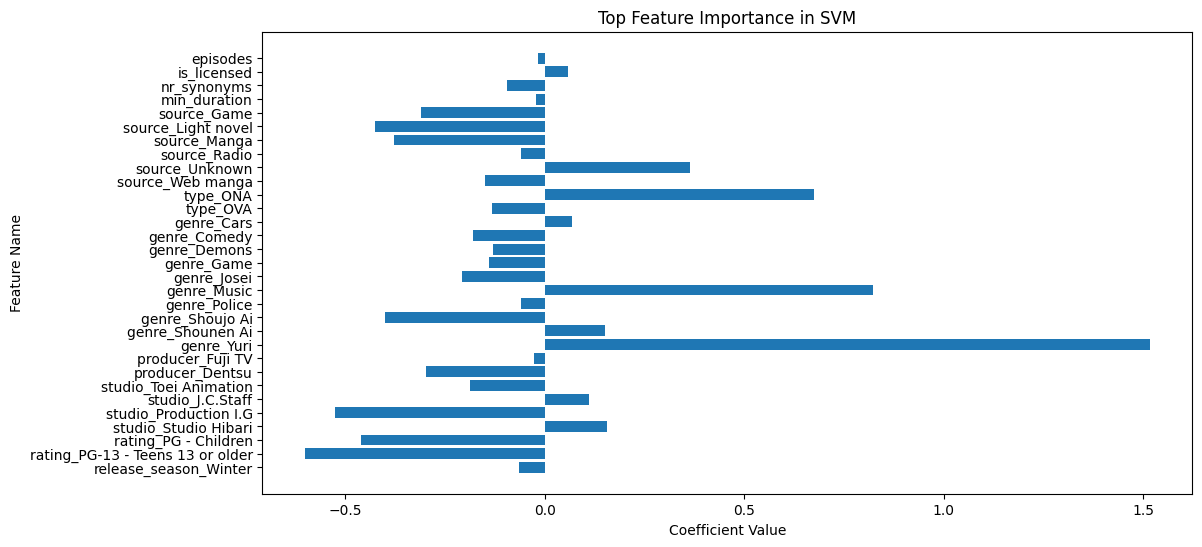

In [28]:
X = filtered_df_svm.drop(['class','score'], axis=1)
y = filtered_df_svm['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf_ite = svm.SVC(kernel='linear', verbose=2)

clf_ite.fit(X_train, y_train)

y_train_pred_svm = clf_ite.predict(X_train)

y_test_pred_svm = clf_ite.predict(X_test)

print(classification_report(y_train, y_train_pred_svm))
print(classification_report(y_test, y_test_pred_svm))

feature_names = X_train.columns
coefficients = clf_ite.coef_[0]
plot_feature_importance(coefficients, feature_names)

In [29]:
clf_ite = svm.SVC(kernel='rbf', verbose=2)

clf_ite.fit(X_train, y_train)

y_train_pred_svm = clf_ite.predict(X_train)

y_test_pred_svm = clf_ite.predict(X_test)

print(classification_report(y_train, y_train_pred_svm))
print(classification_report(y_test, y_test_pred_svm))

feature_names = X_train.columns

[LibSVM]                      precision    recall  f1-score   support

 Score 4.0-6.0 - bad       0.61      0.41      0.49      2012
 Score 6.0-7.5 - mid       0.65      0.90      0.76      5154
Score 7.5-9.0 - good       1.00      0.00      0.00      1300

            accuracy                           0.65      8466
           macro avg       0.76      0.44      0.42      8466
        weighted avg       0.70      0.65      0.58      8466

                      precision    recall  f1-score   support

 Score 4.0-6.0 - bad       0.66      0.42      0.51       524
 Score 6.0-7.5 - mid       0.66      0.92      0.77      1275
Score 7.5-9.0 - good       0.00      0.00      0.00       318

            accuracy                           0.66      2117
           macro avg       0.44      0.45      0.43      2117
        weighted avg       0.56      0.66      0.59      2117



C:\Users\simon\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\simon\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\simon\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classificati

#### Tried changing the kernel  as rbf also should be better with higher dimensionality and non linear relationships. It's way faster, but predicts all anime to be bad.

### Although both SVM's looks less biased, theres a lot of hyper-parameters to be tuned on the GD tree and it already has better overall accuracy so lets try and tune it

### 6. Fine-tune the system
1. Fine-tune the hyperparameters
2. Once you are confident about your final model, measure its performance on the test set to estimate the generalisation error

### Using grid-search to tune the model

Best: -0.637711 using {'n_estimators': 190}
-0.777330 (0.005847) with: {'n_estimators': 20}
-0.745409 (0.006897) with: {'n_estimators': 30}
-0.722981 (0.007382) with: {'n_estimators': 40}
-0.706760 (0.007932) with: {'n_estimators': 50}
-0.694811 (0.008892) with: {'n_estimators': 60}
-0.685483 (0.009650) with: {'n_estimators': 70}
-0.677700 (0.010132) with: {'n_estimators': 80}
-0.671545 (0.010814) with: {'n_estimators': 90}
-0.666199 (0.011289) with: {'n_estimators': 100}
-0.661568 (0.011595) with: {'n_estimators': 110}
-0.657695 (0.011820) with: {'n_estimators': 120}
-0.653800 (0.012176) with: {'n_estimators': 130}
-0.650477 (0.012667) with: {'n_estimators': 140}
-0.647514 (0.012839) with: {'n_estimators': 150}
-0.644714 (0.013038) with: {'n_estimators': 160}
-0.642249 (0.013319) with: {'n_estimators': 170}
-0.639822 (0.013389) with: {'n_estimators': 180}
-0.637711 (0.013902) with: {'n_estimators': 190}


Text(0, 0.5, 'Log Loss')

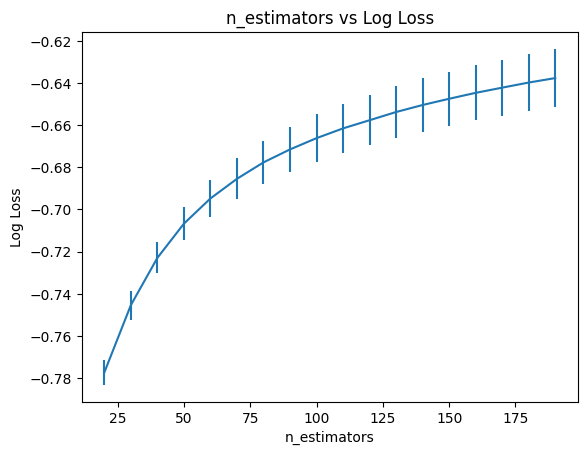

In [122]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold

X = filtered_df_gb.drop(['class','score'], axis=1)
y = filtered_df_gb['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


label_encoded_y = LabelEncoder().fit_transform(y)

# Started with learning rate of 0.1 - but changing to 0.05 since it should be better when high n_estimators is best
model = GradientBoostingClassifier(learning_rate=0.05)
n_estimators = range(20, 200, 10)
param_grid = dict(n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X, label_encoded_y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))
# plot
plt.errorbar(n_estimators, means, yerr=stds)
plt.title("n_estimators vs Log Loss")
plt.xlabel('n_estimators')
plt.ylabel('Log Loss')

Best: -0.606677 using {'n_estimators': 500}
-0.635772 (0.014117) with: {'n_estimators': 200}
-0.621021 (0.016322) with: {'n_estimators': 300}
-0.612278 (0.016559) with: {'n_estimators': 400}
-0.606677 (0.017326) with: {'n_estimators': 500}


Text(0, 0.5, 'Log Loss')

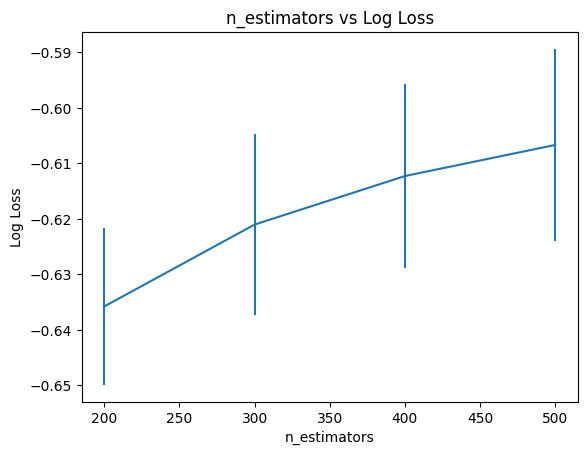

In [123]:
label_encoded_y = LabelEncoder().fit_transform(y)

model = GradientBoostingClassifier(learning_rate=0.05)
n_estimators = range(200, 501, 100)
param_grid = dict(n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X, label_encoded_y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))
# plot
plt.errorbar(n_estimators, means, yerr=stds)
plt.title("n_estimators vs Log Loss")
plt.xlabel('n_estimators')
plt.ylabel('Log Loss')

### It seems to not give much in terms of performance to increase n_estimators above 100, also we dont want to overfit - so lets keep it at 100

### Now lets tree specific parameters

##### Max_depth & min_samples_split

Best: -0.592053 using {'max_depth': 11, 'min_samples_split': 100}
-0.628867 (0.012302) with: {'max_depth': 5, 'min_samples_split': 100}
-0.630122 (0.013043) with: {'max_depth': 5, 'min_samples_split': 200}
-0.633243 (0.012747) with: {'max_depth': 5, 'min_samples_split': 300}
-0.635314 (0.012379) with: {'max_depth': 5, 'min_samples_split': 400}
-0.607437 (0.011657) with: {'max_depth': 7, 'min_samples_split': 100}
-0.610078 (0.012032) with: {'max_depth': 7, 'min_samples_split': 200}
-0.614788 (0.011994) with: {'max_depth': 7, 'min_samples_split': 300}
-0.619173 (0.012035) with: {'max_depth': 7, 'min_samples_split': 400}
-0.596559 (0.011710) with: {'max_depth': 9, 'min_samples_split': 100}
-0.600729 (0.011417) with: {'max_depth': 9, 'min_samples_split': 200}
-0.605183 (0.011219) with: {'max_depth': 9, 'min_samples_split': 300}
-0.608299 (0.011649) with: {'max_depth': 9, 'min_samples_split': 400}
-0.592053 (0.012717) with: {'max_depth': 11, 'min_samples_split': 100}
-0.595004 (0.012230) wi

Text(0, 0.5, 'Log Loss')

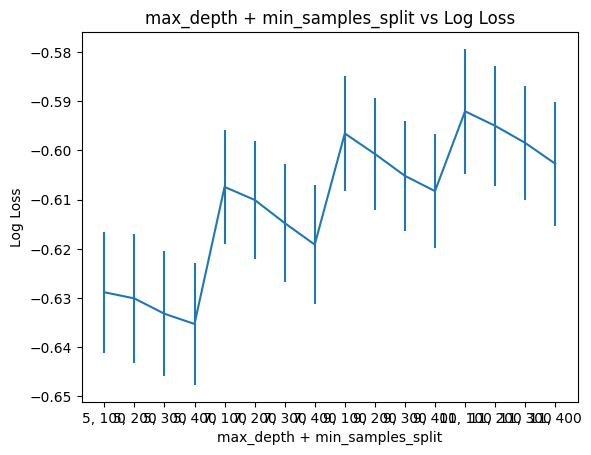

In [124]:
label_encoded_y = LabelEncoder().fit_transform(y)

model = GradientBoostingClassifier(learning_rate=0.05, n_estimators=100)
param_grid = {'max_depth':range(5,12,2), 'min_samples_split':range(100,401,100)}
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X, label_encoded_y)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))

# plot
param_combinations = []
for depth in param_grid['max_depth']:
    for split in param_grid['min_samples_split']:
        param_combinations.append(str(depth) + ', ' + str(split))
        

plt.errorbar(param_combinations, means, yerr=stds)
plt.title("max_depth + min_samples_split vs Log Loss")
plt.xlabel('max_depth + min_samples_split')
plt.ylabel('Log Loss')

##### min_samples_split + min_samples_leaf

Best: -0.601678 using {'min_samples_leaf': 30, 'min_samples_split': 100}
-0.601678 (0.014738) with: {'min_samples_leaf': 30, 'min_samples_split': 100}
-0.602884 (0.013967) with: {'min_samples_leaf': 30, 'min_samples_split': 200}
-0.605832 (0.013746) with: {'min_samples_leaf': 30, 'min_samples_split': 300}
-0.608269 (0.013338) with: {'min_samples_leaf': 30, 'min_samples_split': 400}
-0.602447 (0.014191) with: {'min_samples_leaf': 40, 'min_samples_split': 100}
-0.605277 (0.014731) with: {'min_samples_leaf': 40, 'min_samples_split': 200}
-0.608693 (0.013280) with: {'min_samples_leaf': 40, 'min_samples_split': 300}
-0.610353 (0.013439) with: {'min_samples_leaf': 40, 'min_samples_split': 400}
-0.606471 (0.014366) with: {'min_samples_leaf': 50, 'min_samples_split': 100}
-0.607550 (0.014052) with: {'min_samples_leaf': 50, 'min_samples_split': 200}
-0.610225 (0.012900) with: {'min_samples_leaf': 50, 'min_samples_split': 300}
-0.612988 (0.012301) with: {'min_samples_leaf': 50, 'min_samples_spli

Text(0, 0.5, 'Log Loss')

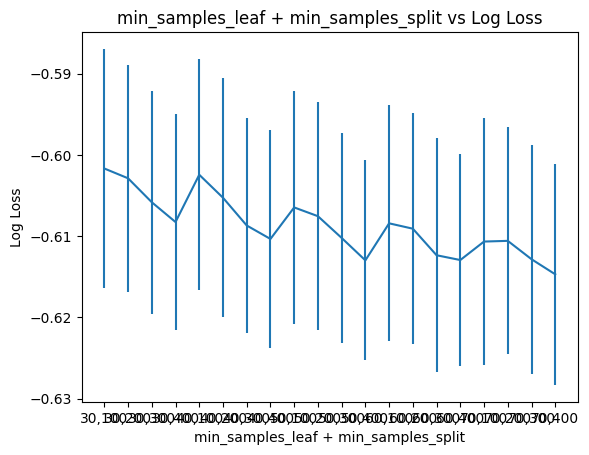

In [126]:
label_encoded_y = LabelEncoder().fit_transform(y)

model = GradientBoostingClassifier(learning_rate=0.05, n_estimators=100, max_depth=11) 
param_grid = {'min_samples_leaf':range(30,71,10), 'min_samples_split':range(100,401,100)}
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X, label_encoded_y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))
# plot

param_combinations = []
for depth in param_grid['min_samples_leaf']:
    for split in param_grid['min_samples_split']:
        param_combinations.append(str(depth) + ',' + str(split))
        

plt.errorbar(param_combinations, means, yerr=stds)
plt.title("min_samples_leaf + min_samples_split vs Log Loss")
plt.xlabel('min_samples_leaf + min_samples_split')
plt.ylabel('Log Loss')

##### max_features

Best: -0.671287 using {'max_features': 49}
-0.713005 (0.006868) with: {'max_features': 7}
-0.704668 (0.009625) with: {'max_features': 9}
-0.697291 (0.009077) with: {'max_features': 11}
-0.692545 (0.007723) with: {'max_features': 13}
-0.688967 (0.008455) with: {'max_features': 15}
-0.686251 (0.008970) with: {'max_features': 17}
-0.682758 (0.008341) with: {'max_features': 19}
-0.681039 (0.009974) with: {'max_features': 21}
-0.679714 (0.009831) with: {'max_features': 23}
-0.678186 (0.009450) with: {'max_features': 25}
-0.676595 (0.009933) with: {'max_features': 27}
-0.676663 (0.009365) with: {'max_features': 29}
-0.675864 (0.009192) with: {'max_features': 31}
-0.675049 (0.009555) with: {'max_features': 33}
-0.674166 (0.009885) with: {'max_features': 35}
-0.674028 (0.009747) with: {'max_features': 37}
-0.674651 (0.009025) with: {'max_features': 39}
-0.672248 (0.009860) with: {'max_features': 41}
-0.672499 (0.009927) with: {'max_features': 43}
-0.672935 (0.009734) with: {'max_features': 45}

Text(0, 0.5, 'Log Loss')

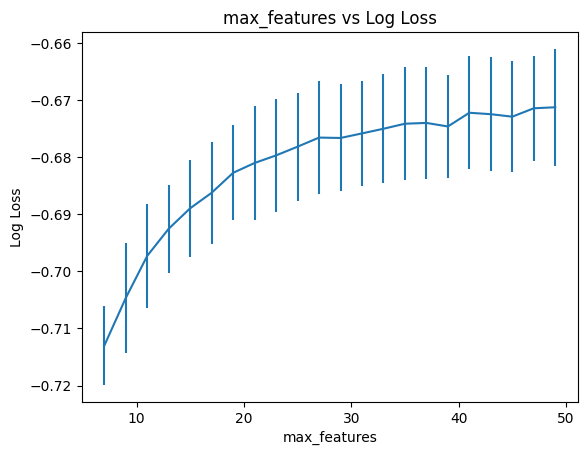

In [131]:
label_encoded_y = LabelEncoder().fit_transform(y)

model = GradientBoostingClassifier(learning_rate=0.05, n_estimators=100, min_samples_leaf=30, min_samples_split=100)
max_features = range(7,51,2)
param_grid = dict(max_features = max_features)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X, label_encoded_y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))
# plot
plt.errorbar(max_features, means, yerr=stds)
plt.title("max_features vs Log Loss")
plt.xlabel('max_features')
plt.ylabel('Log Loss')

# Decided on 39 here, since not much improvement after that

#### Final model

                      precision    recall  f1-score   support

 Score 4.0-6.0 - bad       0.84      0.64      0.73      2012
 Score 6.0-7.5 - mid       0.79      0.93      0.86      5154
Score 7.5-9.0 - good       0.86      0.57      0.68      1300

            accuracy                           0.81      8466
           macro avg       0.83      0.71      0.76      8466
        weighted avg       0.81      0.81      0.80      8466

                      precision    recall  f1-score   support

 Score 4.0-6.0 - bad       0.76      0.59      0.67       524
 Score 6.0-7.5 - mid       0.74      0.89      0.80      1275
Score 7.5-9.0 - good       0.72      0.40      0.51       318

            accuracy                           0.74      2117
           macro avg       0.74      0.63      0.66      2117
        weighted avg       0.74      0.74      0.73      2117



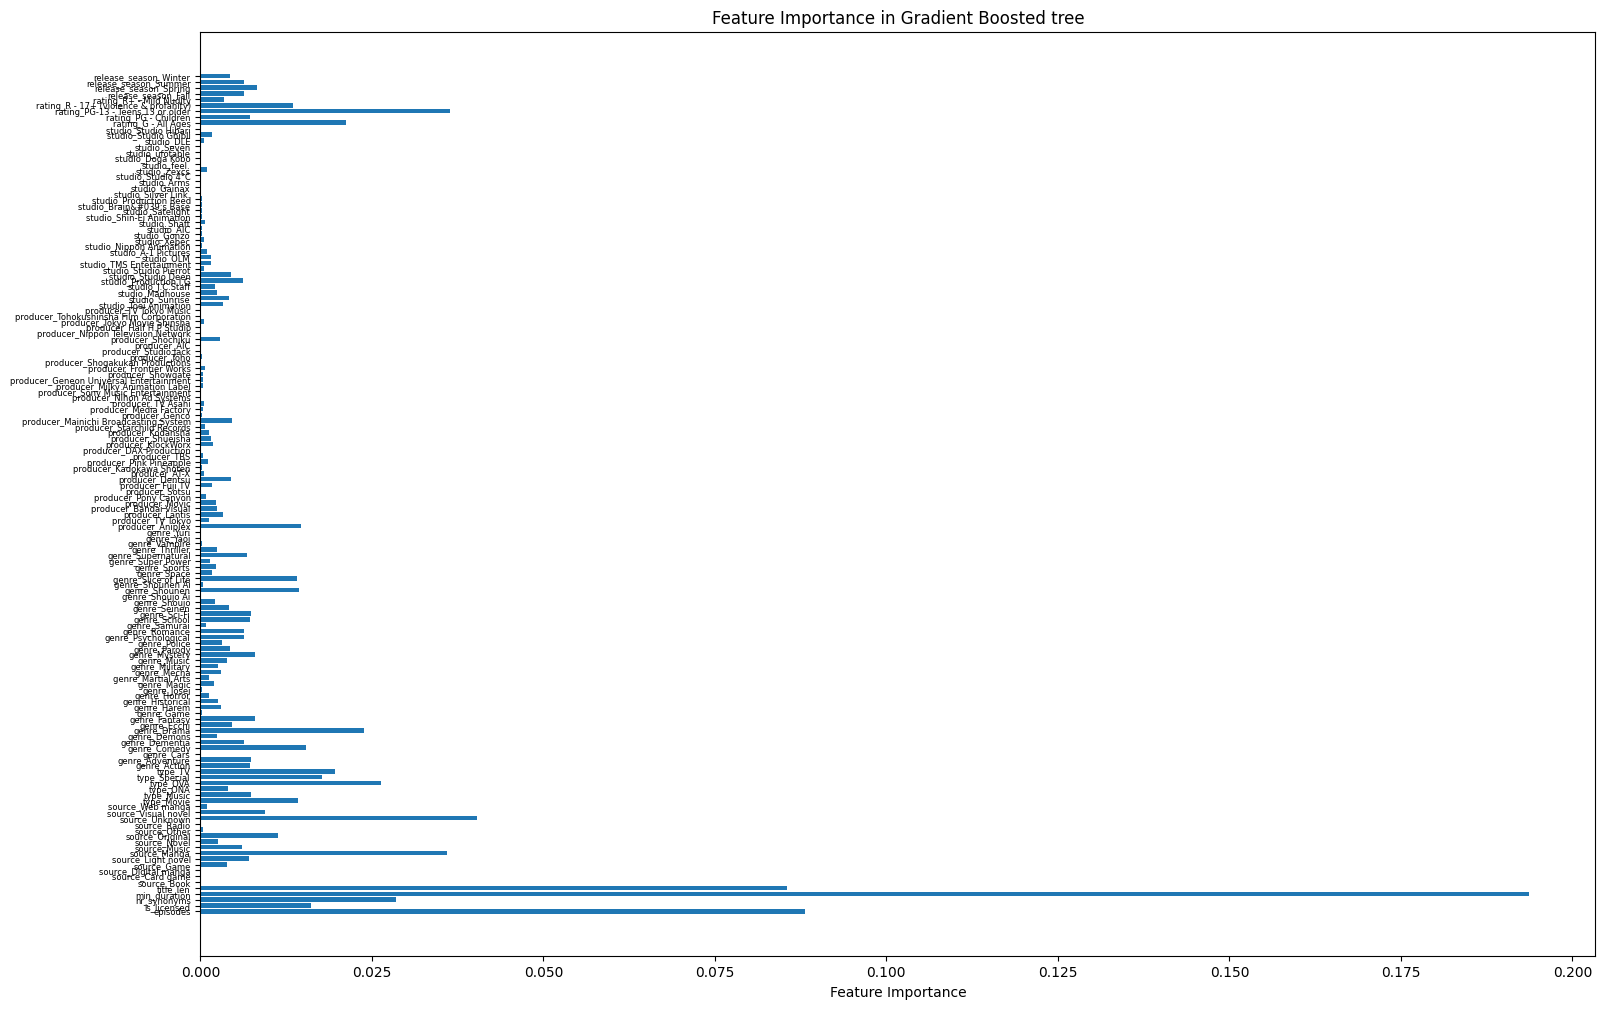

In [132]:

clf_gb_ite = GradientBoostingClassifier(min_samples_split=100, min_samples_leaf=30, max_depth=11, n_estimators=100, learning_rate=0.05,
        max_features=39, subsample=0.8,
    random_state=42)

clf_gb_ite.fit(X_train, y_train)

y_train_pred_gb = clf_gb_ite.predict(X_train)

# Predict the response for the test dataset
y_test_pred_gb = clf_gb_ite.predict(X_test)

print(classification_report(y_train, y_train_pred_gb))
print(classification_report(y_test, y_test_pred_gb))

feature_importances = clf_gb_ite.feature_importances_

# Plot feature importances
plt.figure(figsize=(18, 12))
plt.barh(range(len(feature_importances)), feature_importances)
plt.yticks(range(len(feature_importances)), X_train.columns, fontsize = 6)
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Gradient Boosted tree')
plt.show()